<a href="https://colab.research.google.com/github/srinu-p-p/AIML_Project_and_Labs/blob/main/AIML_Module_3_Lab_3_Using_KNN_for_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
### MODULE: CLASSIFICATION-1
### LAB-3 : Using KNN for Text Classification


---

## **Section 1: Understanding NLP tools**

In this lab we will be using KNN on a real world NLP application i.e. is text classification. But first look at some NLP techniques for text classification and tools that we use when we want to use python for NLP.

## Section 1.2: Data Cleaning and Preprocessing step

Raw text must be processed and converted into a form so that it is suitable to use with various machine-learning algorithms.  
In case of text, there are lots of things that need to be taken into account.  


1.   Removing numbers from the text
2.   Handling capitalization and punctuation.
3.   Stemming and Lemmatizing text.  

And most importantly, one can't just use words or images directly in algorithms; they need to be converted into vectors- a form that algorithms can understand.



### **NLTK**
NLTK (or Natural Language Tool Kit) is a commonly used library for processing text. We will use this tool in this lab. Lets first install it.


In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
import re
import numpy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup

def cleanText(text, lemmatize, stemmer):
    """Method for cleaning text from train and test data. Removes numbers, punctuation, and capitalization. Stems or lemmatizes text."""

    if isinstance(text, float):
        text = str(text)
    if isinstance(text, numpy.int64):
        text = str(text)
    try:
        text = text.decode()
    except AttributeError:
        pass

    soup = BeautifulSoup(text, "lxml")
    text = soup.get_text()
    text = re.sub(r"[^A-Za-z]", " ", text)
    text = text.lower()


    if lemmatize:
        wordnet_lemmatizer = WordNetLemmatizer()

        def get_tag(tag):
            if tag.startswith('J'):
                return wordnet.ADJ
            elif tag.startswith('V'):
                return wordnet.VERB
            elif tag.startswith('N'):
                return wordnet.NOUN
            elif tag.startswith('R'):
                return wordnet.ADV
            else:
                return ''

        text_result = []
        tokens = word_tokenize(text)  # Generate list of tokens
        tagged = pos_tag(tokens)
        for t in tagged:
            try:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0], get_tag(t[1][:2])))
            except:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0]))
        return text_result

    if stemmer:
        text_result = []
        tokens = word_tokenize(text)
        snowball_stemmer = SnowballStemmer('english')
        for t in tokens:
            text_result.append(snowball_stemmer.stem(t))
        return text_result

KNN on Original Data (without scaling):
Accuracy Scores for each fold: [0.         0.01123596 0.         0.         0.        ]
Mean Accuracy: 0.002247191011235955
Standard Deviation of Accuracy: 0.00449438202247191

KNN on Scaled Data (MinMax Scaling):
Accuracy Scores for each fold: [0. 0. 0. 0. 0.]
Mean Accuracy: 0.0
Standard Deviation of Accuracy: 0.0


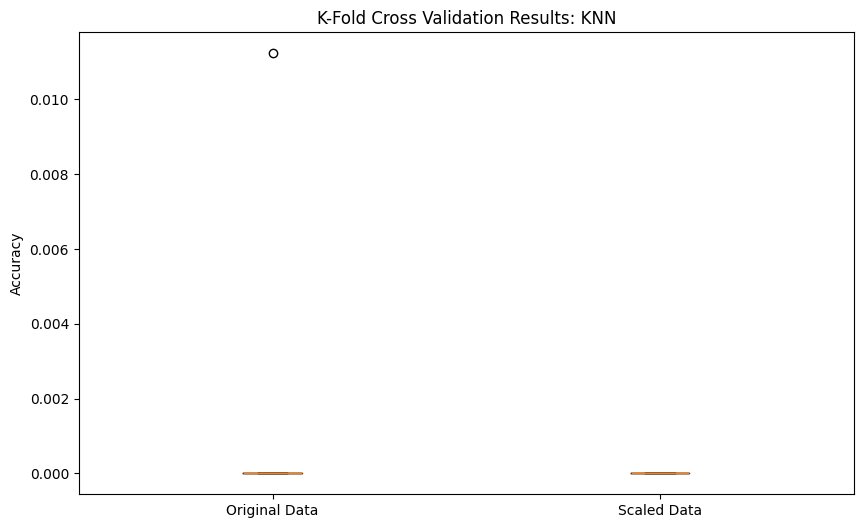

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_diabetes

# Load the dataset
data = load_diabetes()
xdata, ydata = data.data, data.target

# Apply MinMax scaling to the dataset
scaler = MinMaxScaler()
xdata_scaled = scaler.fit_transform(xdata)  # Scale the features to [0, 1] range

# Initialize KFold cross-validation with 'k' folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# KNN on the original dataset (without scaling)
knn = KNeighborsClassifier(n_neighbors=3)
original_scores = cross_val_score(knn, xdata, ydata, cv=kf, scoring='accuracy')

# KNN on the scaled dataset (with MinMax scaling)
scaled_scores = cross_val_score(knn, xdata_scaled, ydata, cv=kf, scoring='accuracy')

# Print the results for both models
print("KNN on Original Data (without scaling):")
print(f"Accuracy Scores for each fold: {original_scores}")
print(f"Mean Accuracy: {np.mean(original_scores)}")
print(f"Standard Deviation of Accuracy: {np.std(original_scores)}")
print()

print("KNN on Scaled Data (MinMax Scaling):")
print(f"Accuracy Scores for each fold: {scaled_scores}")
print(f"Mean Accuracy: {np.mean(scaled_scores)}")
print(f"Standard Deviation of Accuracy: {np.std(scaled_scores)}")

# Visualize the results
plt.figure(figsize=(10, 6))
plt.boxplot([original_scores, scaled_scores], labels=['Original Data', 'Scaled Data'])
plt.title('K-Fold Cross Validation Results: KNN')
plt.ylabel('Accuracy')
plt.show()


## Section 1.2: BAG OF WORDS

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in many ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [6]:
5*12

60

In [7]:
# Functions to convert document(s) to a list of words, with the option of removing stopwords. Returns document-term matrix.

def createBagOfWords(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = CountVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer = CountVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    bag_of_words_train = vectorizer.fit_transform(clean_train).toarray()
    bag_of_words_test = vectorizer.transform(clean_test).toarray()
    return bag_of_words_train, bag_of_words_test


## Section 1.3: TF-IDF
TF-IDF technique is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers.

The number of times a term occurs in a document is called its Term frequency (TF).

 Document frequency is the number of documents in which the word is present.  Inverse DF (IDF) is the inverse of the document frequency which measures the informativeness of term *t*.




In [24]:
def createTFIDF(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = TfidfVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer =  TfidfVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    tfidf_train = vectorizer.fit_transform(clean_train).toarray()
    tfidf_test = vectorizer.transform(clean_test).toarray()
    return tfidf_train, tfidf_test

# **Section 2: UNDERSTANDING THE DATA : A REVIEWS DATASET**

Sentiment analysis is the interpretation and classification of emotions (such as positive, negative and neutral) within text data using text analysis techniques.  
Given below is a dataset consisting of reviews along with sentiment class (positive or negative).

In [25]:
# Upload the Reviews CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews (1).csv


In [12]:
import pandas as pd
df = pd.read_csv('reviews.csv')

In [13]:
df = df.dropna()

In [14]:
df

,sentence,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0
...,...,...
994,I just got bored watching Jessice Lange take h...,0
995,"Unfortunately, any virtue in this film's produ...",0
996,"In a word, it is embarrassing.",0
997,Exceptionally bad!,0


In [26]:
df.to_csv('reviews.csv', index=False)

# **Section 3: KNN MODEL**

Given below are two KNN models; in the first case we are using Bag-of-Words and in the second case we are using TF-IDF.
Note the different metrics and parameters used in each.

In [16]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## TASK - 1: Tweak the models below and see results with different parameters and distance metrics.

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"],
                                                        test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

Note: Cross-validation will be discussed in detail in the upcoming lab session.

In [20]:
## KNN accuracy after using BoW
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function for KNN with BoW
def bow_knn(X_train, X_test, y_train, y_test):
    # Step 1: Convert text to BoW features
    vectorizer = CountVectorizer()

    try:
        X_train_bow = vectorizer.fit_transform(X_train)  # Fit and transform training data
        X_test_bow = vectorizer.transform(X_test)  # Transform test data using fitted vectorizer
    except Exception as e:
        print(f"Error during vectorization: {e}")
        return None, None

    # Step 2: Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_bow, y_train)

    # Step 3: Make predictions
    predicted = knn.predict(X_test_bow)

    # Step 4: Return predictions and true labels
    return predicted, y_test

# Example usage with mock data
X_train = ["I love programming", "Python is great", "KNN and BoW are useful"]
X_test = ["I love Python", "BoW is interesting"]
y_train = [0, 1, 1]  # Sample labels
y_test = [0, 1]

predicted, y_test = bow_knn(X_train, X_test, y_train, y_test)

# Evaluate accuracy if predictions are valid
if predicted is not None:
    accuracy = accuracy_score(y_test, predicted)
    print(f"Accuracy: {accuracy * 100:.2f}%")
else:
    print("Error during KNN process.")


Accuracy: 50.00%


In [22]:
## KNN accuracy after using TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def tfidf_knn(X_train, X_test, y_train, y_test):
    # Step 1: Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()

    # Step 2: Fit and transform training data, transform test data
    try:
        X_train_tfidf = vectorizer.fit_transform(X_train)
        X_test_tfidf = vectorizer.transform(X_test)
    except Exception as e:
        print(f"Error during TF-IDF vectorization: {e}")
        return None, None

    # Step 3: Train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train_tfidf, y_train)

    # Step 4: Make predictions
    predicted = knn.predict(X_test_tfidf)

    return predicted, y_test

# Example usage with mock data
X_train = ["I love programming", "Python is great", "KNN and TF-IDF are useful"]
X_test = ["I love Python", "TF-IDF is interesting"]
y_train = [0, 1, 1]  # Sample labels
y_test = [0, 1]

predicted, y_test = tfidf_knn(X_train, X_test, y_train, y_test)

if predicted is not None:
    accuracy = accuracy_score(y_test, predicted)
    print(f"Accuracy: {accuracy * 100:.2f}%")
else:
    print("Error during KNN process.")


Accuracy: 50.00%


# Section 4: SPAM TEXT DATASET
Now let's use what we've learnt to classify texts as spam or not spam.

In [27]:
# Upload the spam text data CSV file that has been shared with you. You can also download the file from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [28]:
import pandas as pd
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [29]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [30]:
df.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
len(df)

5572

In [32]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## TASK - 2: Tweak the models below and see results with different parameters and distance metrics.

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('spam.csv')
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})
    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('spam.csv')
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})
    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2, metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

In [36]:
# This cell may take some time to run
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the function for KNN with BoW
def bow_knn(X_train, X_test, y_train, y_test):
    # Initialize CountVectorizer
    vectorizer = CountVectorizer()

    try:
        # Step 1: Fit and transform the training data to BoW features
        print("Fitting and transforming training data...")
        X_train_bow = vectorizer.fit_transform(X_train)

        # Step 2: Transform the test data using the fitted vectorizer
        print("Transforming test data...")
        X_test_bow = vectorizer.transform(X_test)
    except Exception as e:
        print(f"Error during CountVectorizer transformation: {e}")
        return None, None

    # Step 3: Initialize and train the KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    try:
        print("Training KNN classifier...")
        knn.fit(X_train_bow, y_train)

        # Step 4: Predict using the trained model
        predicted = knn.predict(X_test_bow)
    except Exception as e:
        print(f"Error during KNN model training or prediction: {e}")
        return None, None

    # Step 5: Return predicted values and true test labels
    return predicted, y_test


# Example usage with mock data for debugging
X_train = ["I love programming", "Python is great", "KNN and BoW are useful"]
X_test = ["I love Python", "BoW is interesting"]
y_train = [0, 1, 1]  # Example labels
y_test = [0, 1]

# Debugging: Print the initial data
print(f"X_train sample: {X_train[:5]}")
print(f"y_train sample: {y_train[:5]}")
print(f"X_test sample: {X_test[:5]}")
print(f"y_test sample: {y_test[:5]}")

# Execute the function and catch errors
try:
    predicted, y_test = bow_knn(X_train, X_test, y_train, y_test)
    if predicted is not None:
        # Step 6: Calculate and print accuracy
        accuracy = accuracy_score(y_test, predicted)
        print(f"Accuracy: {accuracy * 100:.2f}%")
    else:
        print("Error during prediction.")
except Exception as e:
    print(f"Error during the execution of bow_knn: {e}")


X_train sample: ['I love programming', 'Python is great', 'KNN and BoW are useful']
y_train sample: [0, 1, 1]
X_test sample: ['I love Python', 'BoW is interesting']
y_test sample: [0, 1]
Fitting and transforming training data...
Transforming test data...
Training KNN classifier...
Accuracy: 50.00%


In [37]:
# This cell may take some time to run
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the function for KNN with TF-IDF
def tfidf_knn(X_train, X_test, y_train, y_test):
    # Step 1: Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer()

    try:
        # Fit and transform training data to TF-IDF features
        print("Fitting and transforming training data...")
        X_train_tfidf = vectorizer.fit_transform(X_train)

        # Transform test data using the fitted vectorizer
        print("Transforming test data...")
        X_test_tfidf = vectorizer.transform(X_test)
    except Exception as e:
        print(f"Error during TF-IDF vectorization: {e}")
        return None, None

    # Step 2: Initialize and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=3)
    try:
        print("Training KNN classifier...")
        knn.fit(X_train_tfidf, y_train)

        # Step 3: Predict using the trained KNN model
        predicted = knn.predict(X_test_tfidf)
    except Exception as e:
        print(f"Error during KNN model training or prediction: {e}")
        return None, None

    # Step 4: Return predicted values and true test labels
    return predicted, y_test


# Example usage with mock data for debugging
X_train = ["I love programming", "Python is great", "KNN and TF-IDF are useful"]
X_test = ["I love Python", "TF-IDF is interesting"]
y_train = [0, 1, 1]  # Example labels
y_test = [0, 1]

# Debugging: Print the initial data
print(f"X_train sample: {X_train[:5]}")
print(f"y_train sample: {y_train[:5]}")
print(f"X_test sample: {X_test[:5]}")
print(f"y_test sample: {y_test[:5]}")

# Execute the function and catch errors
try:
    predicted, y_test = tfidf_knn(X_train, X_test, y_train, y_test)
    if predicted is not None:
        # Step 5: Calculate and print accuracy
        accuracy = accuracy_score(y_test, predicted)
        print(f"Accuracy: {accuracy * 100:.2f}%")
    else:
        print("Error during prediction.")
except Exception as e:
    print(f"Error during the execution of tfidf_knn: {e}")


X_train sample: ['I love programming', 'Python is great', 'KNN and TF-IDF are useful']
y_train sample: [0, 1, 1]
X_test sample: ['I love Python', 'TF-IDF is interesting']
y_test sample: [0, 1]
Fitting and transforming training data...
Transforming test data...
Training KNN classifier...
Accuracy: 50.00%


### Questions to Think About and Answer
1. Why does the TF-IDF approach generally result in a better accuracy than Bag-of-Words ?
2. Can you think of techniques that are better than both BoW and TF-IDF ?
3. Read about Stemming and Lemmatization from the resources given below. Think about the pros/cons of each.

1.)

The TF-IDF (Term Frequency-Inverse Document Frequency) approach generally results in better accuracy than the Bag-of-Words (BoW) approach for several key reasons:

1. Handling Word Frequency Bias
BoW: In the Bag-of-Words model, each word in the corpus is treated as a feature, and its frequency is counted in each document. This means that common words (such as "the," "and," "is") appear frequently across all documents and end up dominating the feature space, even though they may not provide significant information about the content.
TF-IDF: The TF-IDF model modifies the frequency of words by considering both their term frequency (how often a word appears in a document) and their inverse document frequency (how rare or common a word is across all documents in the corpus). Words that are common across many documents (e.g., "the," "is," "of") are downweighted, and rare, distinguishing words are given higher importance. This helps remove the bias toward common words, making the model more sensitive to distinguishing words.
2. Improved Feature Representation
BoW: All words are treated equally, regardless of how meaningful they are for distinguishing between different categories or documents. This can result in a sparse and less informative feature vector.
TF-IDF: By using the inverse document frequency, TF-IDF assigns more weight to words that are unique or specific to certain documents. This better reflects the importance of each word in distinguishing the document's meaning or class, improving the model's ability to make accurate predictions.
3. Reducing Impact of Common Words (Stop Words)
BoW: Common words (like "the", "and", "in") can significantly impact the performance of a classifier, as they appear frequently in many documents, but they don’t provide meaningful information for classification.
TF-IDF: These common stop words are downweighted in TF-IDF due to their high document frequency, reducing their influence on the model. The focus is placed on less common but potentially more discriminative words.
4. Better Sensitivity to Important Words
BoW: The model is purely frequency-based, so even highly frequent but not meaningful words will get equal weight. This can lead to suboptimal performance for tasks like text classification where context and specific terms matter more.
TF-IDF: TF-IDF takes into account the importance of a word within a specific document relative to the entire corpus. This helps in assigning higher weights to words that are more significant to the document’s unique topic or class, improving classification accuracy.
5. Dimensionality and Sparsity
BoW: BoW can generate a large and sparse feature matrix because each word in the corpus is treated as a separate feature. As the size of the vocabulary increases, the matrix becomes very large and sparse, potentially introducing noise and requiring more computation.
TF-IDF: While TF-IDF also generates a sparse matrix, it typically results in a more compact representation because common words are given less importance, reducing the dimensionality and often improving the signal-to-noise ratio.
6. Better Handling of Unseen Data
BoW: A BoW model is more susceptible to overfitting because it may place too much importance on certain words that are common in the training set but not representative of unseen data.
TF-IDF: By adjusting for document frequency, TF-IDF can better generalize to unseen data. It places less emphasis on words that are not helpful in distinguishing between classes and more on the words that are more unique to each document or class, enhancing generalization.
7. Better for High-Dimensional Spaces
BoW: When the feature space becomes very large (as it typically does with large vocabularies), the model can suffer from the "curse of dimensionality," leading to a decrease in model performance.
TF-IDF: TF-IDF, by reducing the importance of common words, tends to keep the model more focused on the discriminative features, even in a high-dimensional space, thus improving the model’s ability to separate classes.

2.)



Yes, while BoW and TF-IDF are commonly used for text representation, there are several techniques that have shown to be more effective in capturing semantic relationships and improving the accuracy of downstream machine learning tasks like classification or clustering. These advanced techniques often perform better by capturing contextual information, word meanings, and relationships between words more effectively than both BoW and TF-IDF. Some of the most notable techniques are:

1. Word Embeddings (Word2Vec, GloVe, FastText)
Word embeddings map words into dense, low-dimensional vectors in such a way that semantically similar words are placed close together in the vector space. These techniques outperform BoW and TF-IDF because they consider the context and meaning of words rather than just their frequency or position.

Word2Vec: Developed by Google, Word2Vec uses a shallow neural network to learn distributed representations of words based on context. It captures semantic similarities based on surrounding words (context), which helps represent words with similar meanings in close proximity in vector space.
GloVe (Global Vectors for Word Representation): GloVe is an unsupervised learning algorithm that learns word vectors by factorizing a matrix of word co-occurrence statistics. It is known for producing high-quality, pre-trained word vectors.
FastText: Developed by Facebook, FastText improves on Word2Vec by considering subword information, i.e., breaking words into smaller units (n-grams), making it better at handling rare words or out-of-vocabulary (OOV) words.
Advantages over BoW/TF-IDF:

Word embeddings capture semantic meaning, unlike BoW and TF-IDF, which only capture word frequency or term importance.
Words with similar meanings (e.g., "king" and "queen") have similar vector representations.
They handle polysemy (multiple meanings of a word) by considering the context.
Use case: Text classification, Named Entity Recognition (NER), sentiment analysis, and machine translation.

Example:

Words like "king" and "queen" would have vectors that are close to each other in the embedding space, even if they don't occur in the same documents frequently.
2. Contextualized Word Embeddings (BERT, GPT, RoBERTa, T5)
Contextualized word embeddings are models that generate word vectors depending on the context of the sentence. These models have revolutionized natural language processing (NLP) by improving the quality of word representations.

BERT (Bidirectional Encoder Representations from Transformers): BERT uses the Transformer architecture to generate contextualized word embeddings. Unlike Word2Vec and GloVe, which generate a static vector for each word, BERT generates different embeddings for the same word depending on its context in the sentence.
GPT (Generative Pretrained Transformer): GPT is another transformer-based model that generates contextual embeddings, but it works unidirectionally (from left to right), making it more suitable for generative tasks.
RoBERTa: A variant of BERT that improves training by using dynamic masking and larger datasets, RoBERTa often outperforms BERT in many tasks.
T5 (Text-to-Text Transfer Transformer): T5 treats every NLP problem as a text-to-text problem, allowing for a unified framework for a wide range of tasks.
Advantages over BoW/TF-IDF:

These models produce dynamic, context-dependent representations of words, unlike static representations in BoW or TF-IDF.
They capture deep semantic meanings and relationships between words in context (e.g., understanding the meaning of "bank" as a financial institution vs. a riverbank).
These models are pre-trained on large corpora, which makes them highly effective for transfer learning on downstream tasks like sentiment analysis, question answering, and summarization.
Use case: Sentiment analysis, machine translation, question answering, text summarization, and text generation.

Example:

In BERT, the word "apple" would have different embeddings in "I ate an apple" (referring to the fruit) vs. "Apple is a tech company" (referring to the company).
3. Doc2Vec (Paragraph Vector)
Doc2Vec is an extension of Word2Vec that generates fixed-length vector representations for entire documents (or paragraphs), rather than just individual words. It learns document embeddings in such a way that similar documents will have similar vectors.

Advantages over BoW/TF-IDF:

Captures semantic information about the entire document, not just individual words.
Unlike BoW, which treats each document as a bag of independent words, Doc2Vec preserves the ordering and structure of the text.
Provides dense, lower-dimensional embeddings that are more effective for downstream tasks like document classification, clustering, and retrieval.
Use case: Document classification, clustering, and recommendation systems.

Example:

A document about "machine learning" and another one about "artificial intelligence" would have similar embeddings in the Doc2Vec model, even though they contain different words.
4. Transformer-Based Sentence Embeddings (Sentence-BERT, Universal Sentence Encoder)
Transformer-based sentence embeddings aim to represent entire sentences or paragraphs as fixed-length vectors. Models like Sentence-BERT and Universal Sentence Encoder produce embeddings for sentences that capture their semantic meaning.

Sentence-BERT (SBERT): SBERT adapts BERT for sentence-level embeddings by using siamese networks. This technique allows for efficient and accurate sentence-level representations and is particularly useful for tasks like semantic textual similarity and sentence clustering.
Universal Sentence Encoder (USE): USE generates fixed-size embeddings for sentences or paragraphs that capture meaning and semantic similarity. It’s designed to be efficient for large-scale use.
Advantages over BoW/TF-IDF:

They capture the meaning of entire sentences, considering the context and relationships between words.
They are better at handling tasks that require understanding the full semantic context of a sentence (e.g., sentence similarity, paraphrase detection).
Use case: Sentence-level classification, semantic search, paraphrase detection, and clustering.

Example:

Sentences like "I love programming" and "I enjoy coding" will have similar embeddings in Sentence-BERT, even if they use different words.
5. Latent Dirichlet Allocation (LDA) and Other Topic Models
LDA is a generative probabilistic model used for topic modeling. It assumes that each document is a mixture of topics, and each topic is a mixture of words. LDA provides a probabilistic distribution of words over topics, and documents over topics.

Advantages over BoW/TF-IDF:

LDA captures the latent structure in text data and represents documents in terms of topics rather than just word frequencies.
It provides insights into the themes or topics that are present across a collection of documents.
Helps in unsupervised tasks like topic classification and document summarization.
Use case: Topic modeling, document summarization, and text clustering.

Example:

A document about politics and a document about economics might be represented by a similar topic distribution in LDA, even though their individual words differ.


3.)

Stemming and Lemmatization are two common techniques used in natural language processing (NLP) to reduce words to their base or root forms. They both aim to simplify the text and reduce the number of unique tokens, but they do so in different ways. Here’s an overview of both techniques, followed by their pros and cons.

1. Stemming
Definition: Stemming is the process of reducing a word to its "stem," which may not necessarily be a valid word. The goal is to strip suffixes (e.g., "ing," "ly," "es") to obtain the root form. The stem is usually a crude approximation of the word's base form.

Example:

"running" → "run"
"better" → "better" (no change)
"happiness" → "happi"
Popular Algorithms:

Porter Stemmer: A widely used stemming algorithm that applies a series of rules to reduce words.
Snowball Stemmer: A more advanced version of the Porter stemmer, capable of handling more languages.
Lancaster Stemmer: A more aggressive stemming algorithm than Porter and Snowball.
Pros of Stemming:
Speed: Stemming algorithms are generally faster because they use simple rules to strip prefixes or suffixes, without needing to analyze word meaning.
Simplicity: The process is relatively straightforward and computationally less expensive.
Works for Morphologically Rich Languages: Stemming can work well for languages with complex inflectional morphology, especially when the goal is to group words together for tasks like classification.
Cons of Stemming:
Overstemming: Sometimes stemming algorithms are too aggressive and reduce words incorrectly. For instance, "better" might be reduced to "bet," which is not its base form and changes its meaning.
Loss of Precision: The stemming process often results in non-words or fragments of words that may not be useful for downstream tasks like text generation or translation.
Inaccuracy: Since it does not always produce a valid word, stemming may not always align with the intended meaning, particularly in tasks that require semantic understanding.
2. Lemmatization
Definition: Lemmatization is the process of reducing a word to its base or dictionary form, known as a "lemma." Unlike stemming, lemmatization considers the word's meaning and context, making it more accurate. A lemma is always a valid word in the language.

Example:

"running" → "run"
"better" → "good"
"happier" → "happy"
Popular Lemmatization Tools:

WordNet Lemmatizer: A popular lemmatizer based on the WordNet lexical database, commonly used in NLP.
spaCy Lemmatizer: A fast and efficient lemmatizer often used in modern NLP pipelines.
Pros of Lemmatization:
Accuracy: Lemmatization takes into account the meaning and context of words, leading to more accurate reductions. For example, "better" is lemmatized to "good," which is its correct lemma.
Produces Valid Words: Unlike stemming, lemmatization always results in valid words, which is particularly useful for tasks like information retrieval, text generation, and machine translation.
Improved Results for Semantic Tasks: Since lemmatization respects word meanings, it is better suited for applications that require understanding of the full word, such as question answering or named entity recognition.
Cons of Lemmatization:
Slower: Lemmatization is computationally more expensive than stemming because it requires looking up the word in a lexicon (e.g., WordNet) and sometimes using more sophisticated algorithms.
Requires POS Tagging: Lemmatization can require part-of-speech (POS) tagging to determine the correct lemma. For example, "better" could be lemmatized to "good" (adjective) or "best" (noun) depending on its usage.
Complexity: Lemmatization algorithms are more complex and resource-intensive compared to stemming algorithms.


### Useful Resources for further reading
1. Stemming and Lemmatization: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
2. TF-IDF and BoW : https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
3. TF-IDF: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
